In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
data=pd.read_csv("Alcohol_Sales.csv")
data.head(5)

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [29]:
data.rename(columns={"DATE":"Date","S4248SM144NCEN":"Sales"},inplace=True)

In [30]:
data["Date"]=pd.to_datetime(data["Date"])

In [31]:
data.head(5)

,Date,Sales
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    325 non-null    datetime64[ns]
 1   Sales   325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [33]:
data.isnull().sum()

Date     0
Sales    0
dtype: int64

In [34]:
data.describe()

,Date,Sales
count,325,325.000000
mean,2005-07-01 13:35:15.692307712,7886.400000
min,1992-01-01 00:00:00,3031.000000
25%,1998-10-01 00:00:00,5231.000000
50%,2005-07-01 00:00:00,7481.000000
75%,2012-04-01 00:00:00,9977.000000
max,2019-01-01 00:00:00,15504.000000
std,NaN,2914.269061


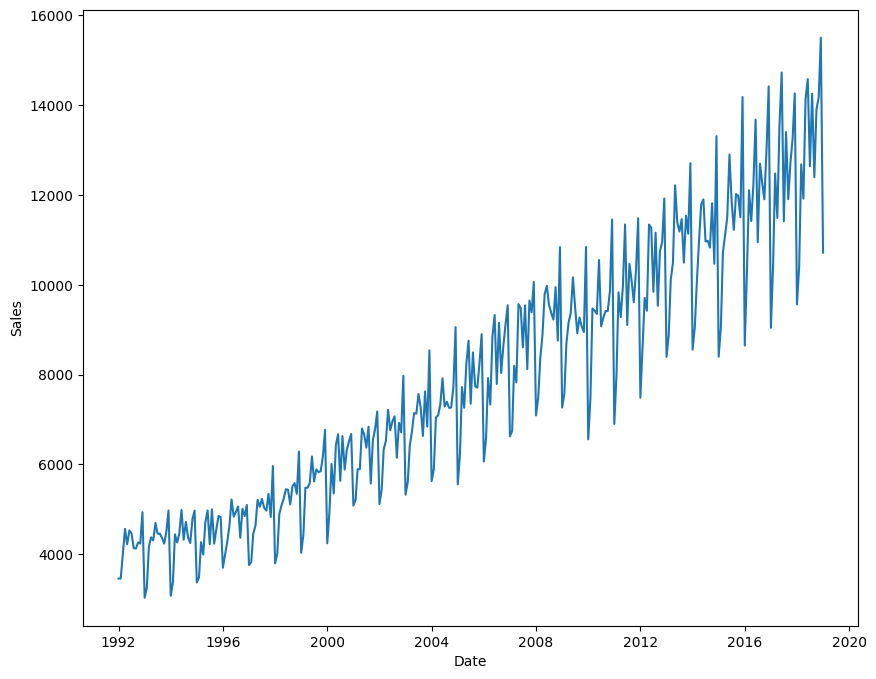

In [35]:
plt.figure(figsize=(10,8))
sns.lineplot(x="Date",y="Sales",data=data)
plt.show()

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
results=adfuller(data["Sales"])

In [38]:
print('ADF Statistic:', results[0])
print('p-value:', results[1])
print('Used Lag:', results[2])
print('Number of Observations Used:', results[3])
print('Critical Values:', results[4])
print('IC Best:', results[5])

if results[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely not stationary.")

ADF Statistic: 2.037404725913703
p-value: 0.9987196267088919
Used Lag: 14
Number of Observations Used: 310
Critical Values: {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}
IC Best: 4458.6002223980295
The time series is likely not stationary.


In [39]:
first_difference=data["Sales"].diff()[1:]

In [40]:
result=adfuller(first_difference)

In [41]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Used Lag:', result[2])
print('Number of Observations Used:', result[3])
print('Critical Values:', result[4])
print('IC Best:', result[5])

if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely not stationary.")

ADF Statistic: -4.365959619246058
p-value: 0.0003408284921169941
Used Lag: 13
Number of Observations Used: 310
Critical Values: {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}
IC Best: 4447.4350241189395
The time series is likely stationary.


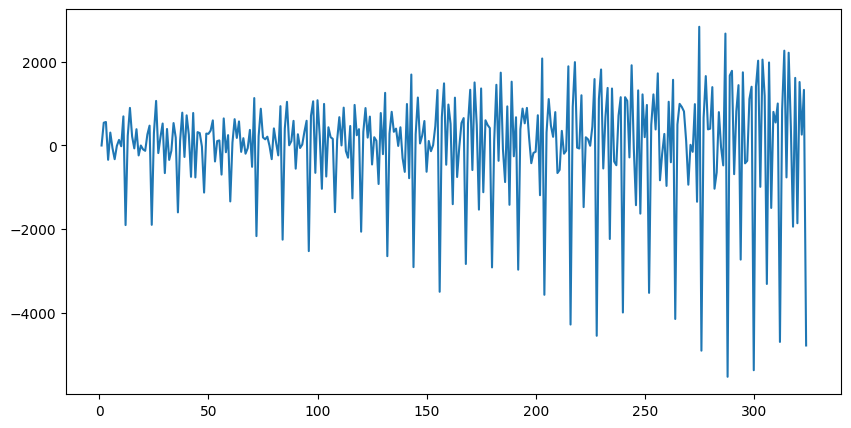

In [42]:
plt.figure(figsize=(10,5))
plt.plot(first_difference)

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

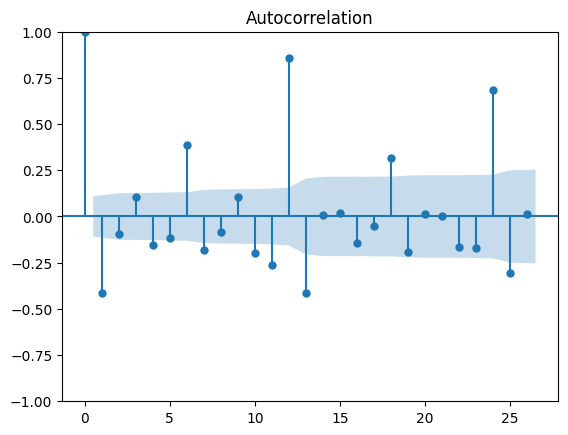

In [44]:
acf_plot=plot_acf(first_difference)

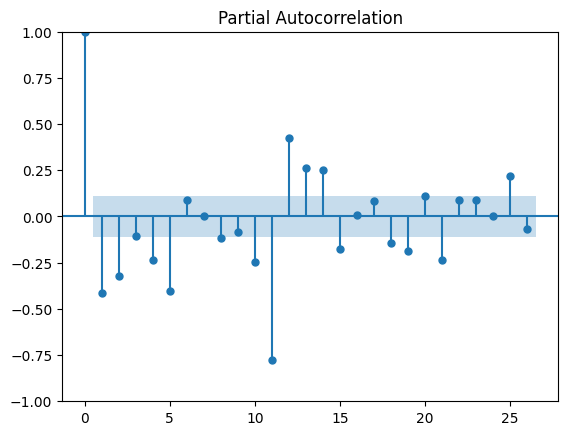

In [45]:
pacf_plot=plot_pacf(first_difference)

In [46]:
num_split=int(data["Sales"].shape[0]*0.8)
train_set=data["Sales"].iloc[:num_split]
test_set=data['Sales'].iloc[num_split:]

In [47]:
import pmdarima as pm

In [48]:
model = pm.auto_arima(train_set, start_p=0, start_q=0, start_order=0, max_p=10 ,max_q=10, max_order=10, test='adf', stepwise=False, trace=True, seasonal=False)


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5361.040, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5077.375, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,6)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,0,7)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,0,8)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(0,0,9)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(0,0,10)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4381.512, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4272.293, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=4270.358, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=4271.134, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.

In [49]:
best_order = model.order
best_model = model.arima_res_
best_model_summary = best_model.summary()

print('Best order:', best_order)


Best order: (8, 0, 2)


In [50]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Sales'], order=(8,0,2)) 
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  325
Model:                 ARIMA(8, 0, 2)   Log Likelihood                   0.000
Date:                Tue, 05 Nov 2024   AIC                             24.000
Time:                        18:57:48   BIC                             69.406
Sample:                             0   HQIC                            42.122
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7886.4013   6.19e-05   1.27e+08      0.000    7886.401    7886.401
ar.L1          1.5632   4.82e-06   3.24e+05      0.000       1.563       1.563
ar.L2          1.6530      0.000   6709.387      0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:693: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


In [53]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape = mean_absolute_percentage_error(test_set.values, rolling_pred.values)
r2=r2_score(test_set.values, rolling_pred.values)
print('MAPE:', mape*100)
print("R2 Score :",r2*100)

MAPE: 0.0
R2 Score : 100.0
